<a href="https://qworld.net" target="_blank" align="left"><img src="../qworld/images/header.jpg"  align="left"></a>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $

<font style="font-size:28px;" align="left"><b> ProjectQ Installation and Test </b></font>

_prepared by Vishal Sharathchandra Bajpe and Abuzer Yakaryilmaz_
<br><br>

- [Check your system](#check)
- [Install ProjectQ](#install)
- [Tips](#tips)
- [Install faster C++ Simulator (Optional)](#test)

<hr id="check">

### Check your system

Here is a simple quantum program written in ProjectQ. 

To run the cell, click on "Run" in the top left to the run cell (Keyboard shortcut for running the cell is Shift+Enter). It should work without any error if ProjectQ has already been installed.   

Otherwise, check the next section!

(Please do not worry about the syntax now, we shall look over it in the tutorials.)

In [1]:
from projectq import MainEngine # import the main compiler engine
from projectq.ops import H, Measure # import the operations we want to perform␣

qengine = MainEngine() # create a default compiler (the back-end is a simulator)
qubit = qengine.allocate_qubit() # allocate 1 qubit
H | qubit # apply a Hadamard gate
Measure | qubit # measure the qubit
qengine.flush() # flush all gates (and execute measurements)
print("Output {}".format(int(qubit))) # output measurement result

Output 1


**You should be able to see the Measured value (either 0 or 1) which should indicate it is installed in your system.**

If you see a prompt "(Note: This is the (slow) Python simulator.)" Please look at the installation section for a fix. Likewise, the python simulator should also work just fine for our workshops.

<hr id="install">

### Install ProjectQ

(If you are an experienced user, visit this link: https://github.com/ProjectQ-Framework/ProjectQ and you can potentially compile a simulator with OpenMP support for fast experience)

You can install projectQ by executing the following cell:

In [2]:
!pip install projectq --user

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for projectq: filename=projectq-0.7.0-cp38-cp38-win_amd64.whl size=558503 sha256=9e73457caecffba0a6471a59748fcccf5043a4ff01beb51f453b3e9282dd81ba
  Stored in directory: c:\users\weilu\appdata\local\pip\cache\wheels\d1\81\ce\ab38074033e3badca0f1bff6726e7a38b00f1d8158b0d27902
Successfully built projectq


__*Restart the kernel*__ (check "Kernel" menu) to apply the changes to the current notebook. Run the cell below to test it out.

In [2]:
from projectq import MainEngine 
from projectq.ops import H, Measure

# To draw in ProjectQ, we use a special backend called CircuitDrawerMatplotlib.
from projectq.backends import CircuitDrawerMatplotlib

# Now we create an instance of this backend
qdrawer = CircuitDrawerMatplotlib()

qengine = MainEngine(engine_list=[qdrawer]) # create a default compiler (the back-end is a simulator)
qubit = qengine.allocate_qubit() # allocate 1 qubit
H | qubit # apply a Hadamard gate
Measure | qubit # measure the qubit
qengine.flush() # flush all gates (and execute measurements)
print("Output {}".format(int(qubit))) # output measurement result

Output 1


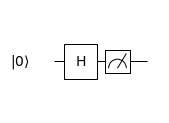

In [3]:
# Display circuit
qdrawer.draw()
Measure | qubit # to avoid warning messages
# re-run the cell if the figures are not shown

**You are done if you see the output and circuit :)**

<hr id="tips">

### Tips

_Any terminal/shell command can be executed in the notebook cells by putting exclamation mark (!) to the beginning of the command._

_$\rightarrow$ For updating projectq version, execute the following command on a code cell_

    !pip install -U projectq --user
    
_$\rightarrow$ For uninstall projectq, execute the following command on a code cell_

    !pip uninstall projectq

In [ ]:
#!pip install -U projectq --user
#!pip uninstall projectq

<hr id="test">

### To install the faster C++ Simulator (Optional)

ProjectQ also has a faster C++ Simulator that needs some additional setting up for install. You need to have a recent version (>=10.0) of g++ and a gcc compiler installed in your system. 

If the requirements are found, <pre>pip install projectq --user</pre> The above command should automatically build the C++ simulator for you. Here is a straightforward way for Windows systems: 

- If you are on Windows, download the Windwos 10 SDK from https://developer.microsoft.com/en-us/windows/downloads/windows-10-sdk/ </pre>
- Download and install Visual C++ compiler https://visualstudio.microsoft.com/vs/features/cplusplus/</pre>

Now your system is setup and ready to go. You can run 

    !pip install projectq --user 
    
to get the faster simulator built for you automatically.

* Note: If you have already installed projectq and it failed to build the faster simulator( if you are getting the slow python simulator prompt, **Please uninstall projectq and reinstall again after downloading the tools above**)

This method builds a fairly fast simulator than the fallback python simulator without OpenMP.

(For advanced users)
For the fastest version, you will have to build it yourself using a different version of g++/gcc/c++ installation other than Visual C++. For more information visit https://github.com/ProjectQ-Framework/ProjectQ

### Run this cell to check if it was successful

In [ ]:
from projectq import MainEngine 
from projectq.ops import H, Measure

# To draw in ProjectQ, we use a special backend called CircuitDrawerMatplotlib.
from projectq.backends import CircuitDrawerMatplotlib

# Now we create an instance of this backend
qdrawer = CircuitDrawerMatplotlib()

qengine = MainEngine(engine_list=[qdrawer]) # create a default compiler (the back-end is a simulator)
qubit = qengine.allocate_qubit() # allocate 1 qubit
H | qubit # apply a Hadamard gate
Measure | qubit # measure the qubit
qengine.flush() # flush all gates (and execute measurements)
print("Output {}".format(int(qubit))) # output measurement result